In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/user/Downloads/MP/healthcare/train.csv')

In [43]:
data.head(25)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7243.5,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,23,a,6,X,2,anesthesia,S,F,2.0,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,32,f,9,Y,1,radiotherapy,S,B,3.0,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,23,a,6,X,4,radiotherapy,Q,F,3.0,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,1,d,10,Y,2,gynecology,R,B,4.0,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,e,1,X,2,gynecology,S,E,3.0,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [5]:
data = data.drop(['case_id','patientid'],axis = 1)

In [6]:
data.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [7]:
data.dtypes

Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [8]:
data.shape

(318438, 16)

In [9]:
# checking for any null values
data.isna().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [10]:
# removing null values

In [11]:
data['City_Code_Patient'][data['City_Code_Patient'].isna()] = data['City_Code_Patient'].mean()

<ipython-input-11-4d2b37fe59b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City_Code_Patient'][data['City_Code_Patient'].isna()] = data['City_Code_Patient'].mean()


In [12]:
data['Bed Grade'][data['Bed Grade'].isna()] = data['Bed Grade'].mean()

<ipython-input-12-c24a2a56cf01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bed Grade'][data['Bed Grade'].isna()] = data['Bed Grade'].mean()


In [13]:
data.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [14]:
obj_Cols = data.dtypes[data.dtypes == 'object']
obj_Cols

Hospital_type_code      object
Hospital_region_code    object
Department              object
Ward_Type               object
Ward_Facility_Code      object
Type of Admission       object
Severity of Illness     object
Age                     object
Stay                    object
dtype: object

In [15]:
# checking for any outliers

In [16]:
import seaborn as sns

In [17]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

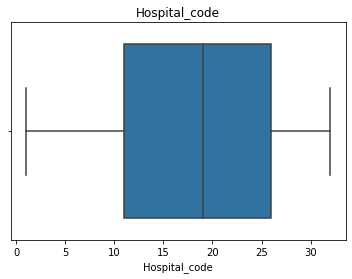

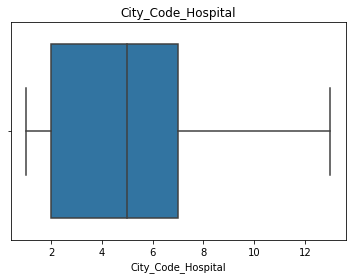

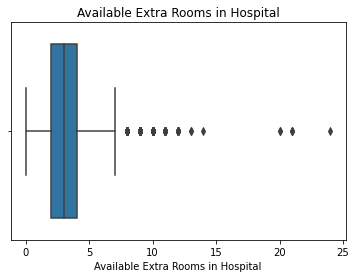

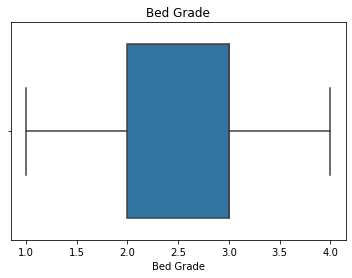

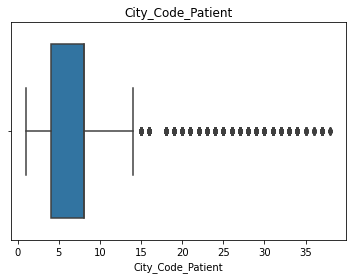

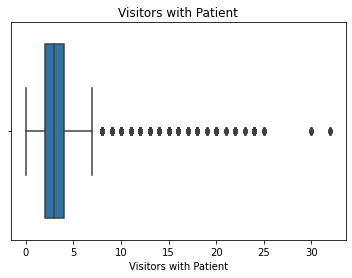

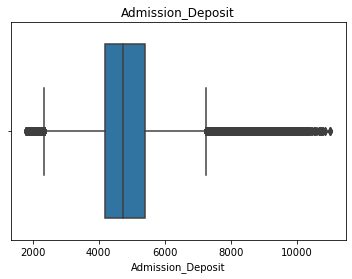

In [18]:
for i in numcols:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [19]:
# removing outlies

In [20]:
for i in numcols:
    desc = data[i].describe()
    IQR = desc['75%'] - desc['25%']
    upper_limit = desc['75%'] + 1.5 * IQR
    lower_limit = desc['25%'] - 1.5 * IQR
    data[i][data[i]>upper_limit] = upper_limit
    data[i][data[i]<lower_limit] = lower_limit

<ipython-input-20-06bbd9f88cce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>upper_limit] = upper_limit
<ipython-input-20-06bbd9f88cce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]<lower_limit] = lower_limit
<ipython-input-20-06bbd9f88cce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>upper_limit] = upper_limit
<ipython-input-20-06bbd9f88cce>:7: SettingWithCopyWarning: 
A value

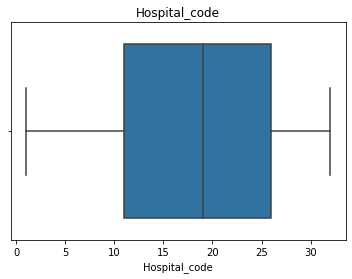

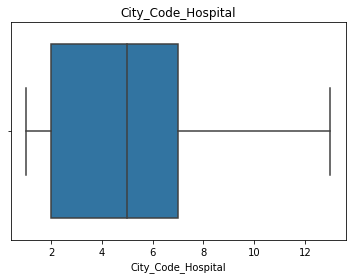

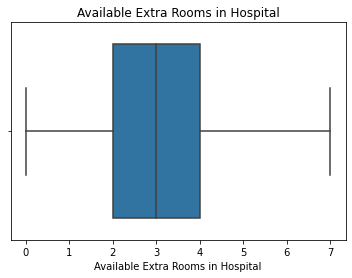

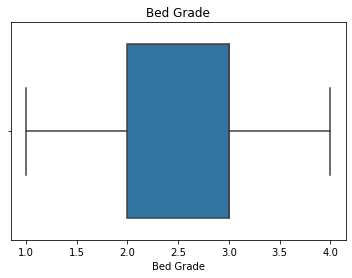

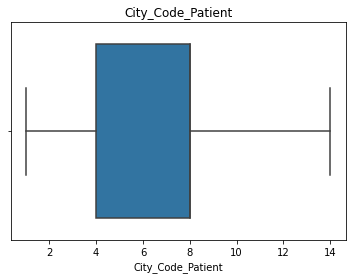

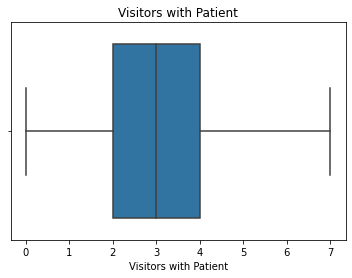

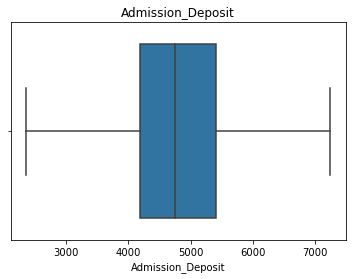

In [21]:
for i in numcols:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [22]:
data['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [23]:
data.dtypes

Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [24]:
data.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7243.5,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [25]:
x = data.drop(['Stay'],axis = 1)
y = data['Stay']

In [26]:
from sklearn import preprocessing
x = pd.get_dummies(x)

In [27]:
x.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,8,3,3,2.0,7.0,2,4911.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,5,2,2.0,7.0,2,5954.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,10,1,2,2.0,7.0,2,4745.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,26,2,2,2.0,7.0,2,7243.5,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,26,2,2,2.0,7.0,2,5558.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
x.shape

(318438, 50)

### Normalization

In [29]:
norm = preprocessing.MinMaxScaler()
normalized_x = norm.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(normalized_x,y,test_size = 0.3,random_state=42)

In [31]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [33]:
classifier.fit(x_train,y_train)

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred_nor = classifier.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred_nor)

0.38994263702214965

In [36]:
from sklearn.model_selection import GridSearchCV

### Random Forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [38]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [42]:
X_train.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
181718,26,2,4,3.0,14.0,2,4436.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
82240,13,5,4,2.0,5.0,2,4627.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
234367,27,7,3,3.0,14.0,2,5899.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
122616,8,3,4,2.0,4.0,2,3389.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
80368,28,11,3,4.0,1.0,3,6340.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
n_estimators = [33,40,46,55,65,80]
criterion = ['gini','entropy']
max_depth = [10,13,15,18,20]
parameters = {'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}
RFC_cls =GridSearchCV(RFC,parameters)

RFC_cls.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [118]:
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 55}

In [119]:
cls_rfc = RandomForestClassifier(n_estimators = 55,criterion = 'gini', max_depth = 15)
cls_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=55,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
y_pred_rfc = cls_rfc.predict(x_test)
accuracy_score(y_test,y_pred_rfc)

0.41755642088514844

### XGboost

In [39]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(x_train, y_train)

/home/user/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 1207  3417  2404    53     6    30     0     2     0     0     3]
 [  691 11585  9332  1049    15   721     1    16     5     2     8]
 [  552  7355 17562   366    12   403     1    13    40     1    35]
 [  305  2783  6799  3673    15  2662     0    42    42     3   101]
 [  131   613  2213   217    15   247     0     7    14     1    34]
 [  134   791  1547  2467    11  5132     1    62   203    11   233]
 [   30   108   428    72     3   144     2     5     8     2    37]
 [   37   173   345   574     8  1569     2    55    62     6   201]
 [   16    48    74   154     2   669     1    16   247     1   209]
 [    8    34    96   114     0   426     1    19    19     4   101]
 [   27    82   119   129     7   627     1    41   151     9   813]]


0.42179583804379683

### SVM

In [44]:
from sklearn.svm import SVC  #SVC - Supoprt Vector Classifier
cls=SVC()
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.001,0.1,10], 'gamma':[0.1,0.01,'auto'],'kernel':['rbf']}

In [ ]:
grid = GridSearchCV(cls, parameters) 
grid.fit(x_train, y_train)

### KNN

In [1]:
from sklearn.neighbors import KNeighborsClassifier
n_classifier = KNeighborsClassifier(n_neighbors=5)

In [31]:
n_classifier.fit(x_train,y_train)
y_pred_KNN=n_classifier.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred_KNN)

0.2900180044383034

### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()

In [36]:
naive_classifier.fit(x_train,y_train)

GaussianNB()

In [37]:
y_pred=naive_classifier.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.1377967592011054

#  Logistic regression  accuracy = 38.99
#  Random Forest Classifier        = 41.75
# XG boost                                     = 42.17
# SVM                                             =?!


# KNN              = 29.0
# Naive bayes = 13.27